In [53]:
# load plotting library and src files
using PyPlot;

include("./src/calcpml_2d.jl");
include("./src/yeeder.jl");
include("./src/fdfd.jl");

In [54]:
n = 800;
BC = [-2,-2];
Nx2 = n;
Ny2 = n;
Nx = div(Nx2,2);     Ny = div(Ny2,2);
ER2  = ones(Complex64,Nx2,Ny2);
e = 4.00;
L = 1;
RES  = [0.01,0.01];
spc = L/4;
(dx,dy)=RES;
dx2 = dx/2;
dy2 = dy/2;
ER2[Int(Nx-L/dx):Int(Nx+L/dx),Int(Nx-L/dx):Int(Nx+L/dx)] = e;

MUR2 = ones(Complex64,Nx2,Ny2);
NPML = [40 40 40 40]
freq = 1;
lambda0 = 1/freq;
Pol = "Hz";
theta = 0;
Q = zeros(Complex64,Nx,Ny);
#Q[Int(Nx/2)-Int(L/2/dx)-Int(spc/dx):Int(Nx/2)+Int(L/2/dx)+Int(spc/dx),Int(Nx/2)-Int(L/2/dx)-Int(spc/dx):Int(Nx/2)+Int(L/2/dx)+Int(spc/dx)] = 0;
#Q[1:end,Int(Nx/2)-Int(L/2/dx)-Int(spc/dx):Int(Nx/2)+Int(L/2/dx)+Int(spc/dx)] = 0;
Q[Int(Nx/2-(L/2+spc)/dx),Int(Ny/2)] = 1;
(Ex,Ey,Ez,Hx,Hy,Hz) = fdfd(ER2,MUR2,RES,NPML,BC,lambda0,Pol,Q;verbose=false,TFSF=false);

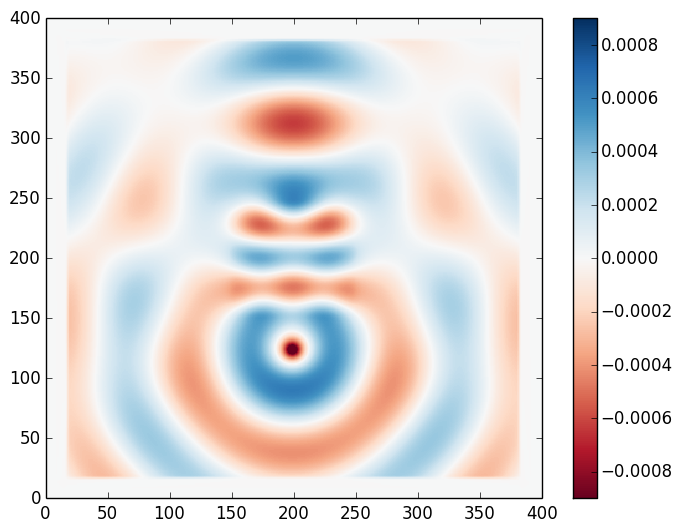

PyObject <matplotlib.colorbar.Colorbar instance at 0x325314c20>

In [55]:
pcolormesh(real(Hz),cmap="RdBu",vmin=-0.0009,vmax = 0.0009)
colorbar()

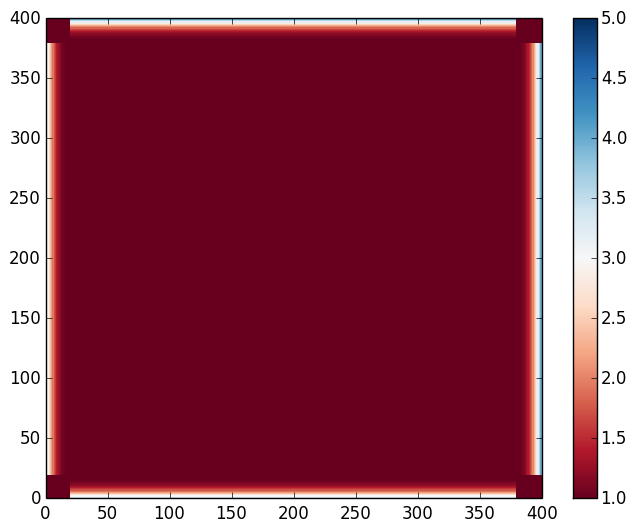

PyObject <matplotlib.colorbar.Colorbar instance at 0x332d7f0e0>

In [57]:
pcolormesh(real(Ez),cmap="RdBu",vmin=1,vmax=5)
colorbar()

In [8]:
dx

0.01

In [9]:
L

1

In [26]:
lambda0

1.0